<a href="https://colab.research.google.com/github/ahmedbilal1510/FAANG_Stocks_Sentiment_Analysis_Project/blob/main/FAANG_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentimental analysis of stocks from Financial news (using Finviz.com)

1. Retreive the data from Finviz.com using BeautifulSoup

In [6]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'GOOG', 'FB', 'AAPL', 'NFLX']

In [3]:
news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

2. Parce the data we got from BeautifulSoup

In [4]:
parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

3. Applying sentiment analysis on the titles of articles using nltk's vader_lexicon (Vader sentiment analysis).

In [7]:
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)

4. Visualize the dataset in a barchart like format to see the highlights of the sentiment of stocks over past days

<Figure size 720x576 with 0 Axes>

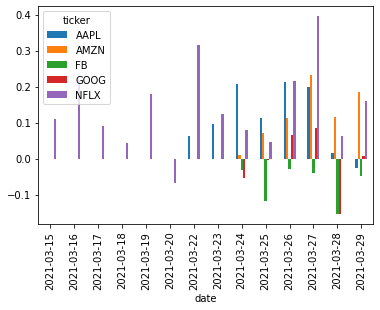

In [8]:
df['date'] = pd.to_datetime(df.date).dt.date

plt.figure(figsize=(10,8))

mean_df = df.groupby(['ticker', 'date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()
mean_df.plot(kind='bar')
plt.show()